4


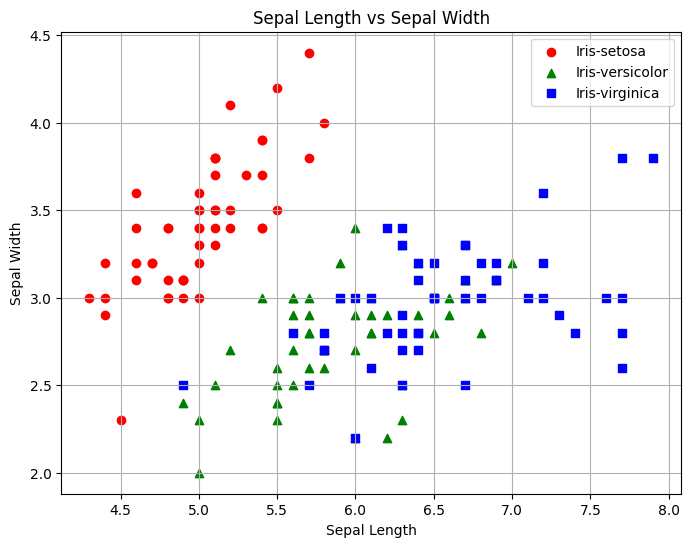

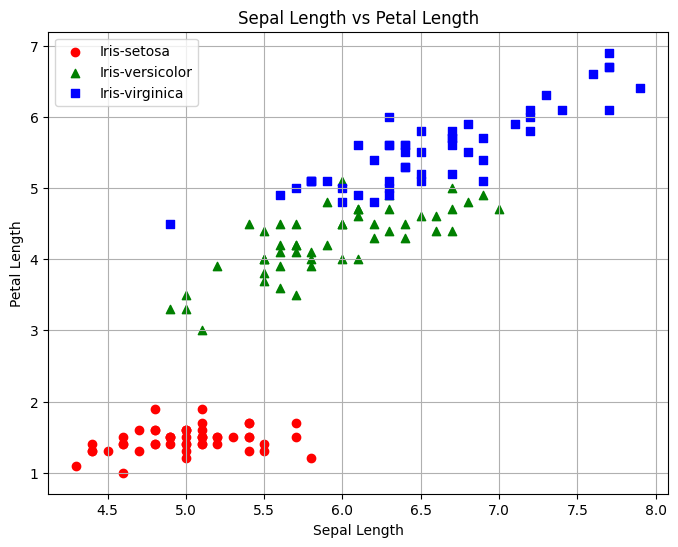

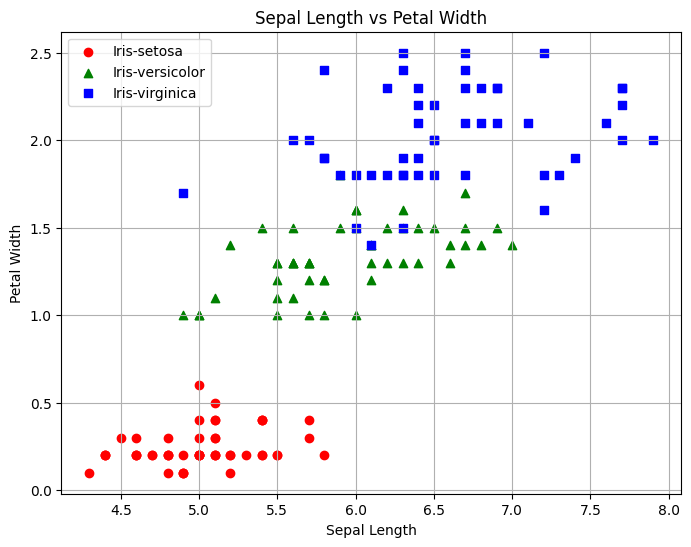

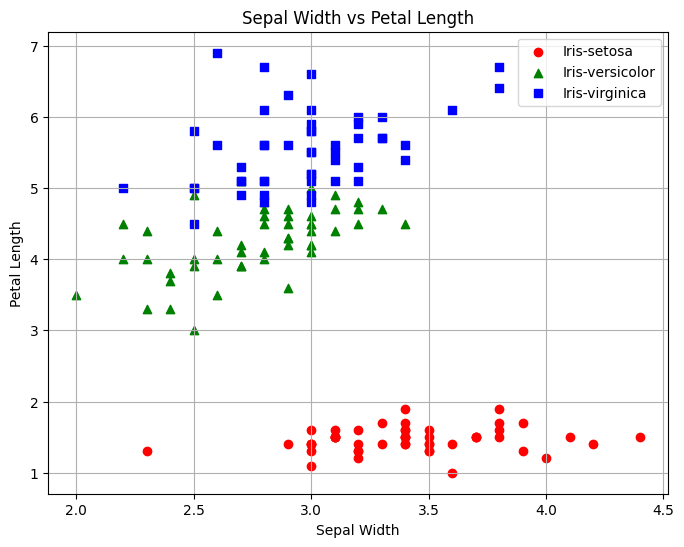

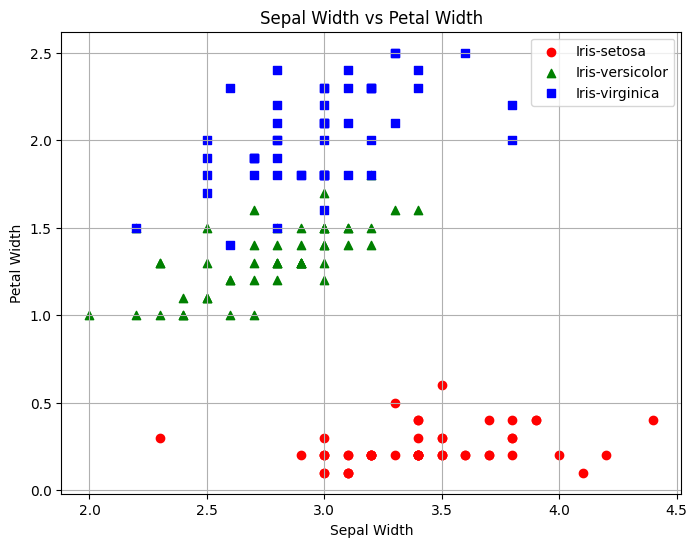

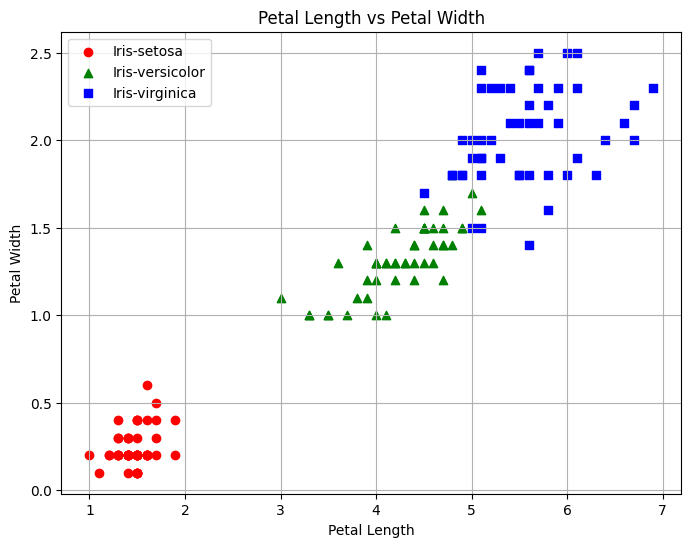

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt

A = []   # Initialize an empty list to store the matrix

with open('iris/iris.data', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    for row in csvreader:
        A.append(row)

A = np.array(A)

sepal_len = A[:, 0].astype(float)
sepal_wid = A[:, 1].astype(float)
petal_len = A[:, 2].astype(float)
petal_wid = A[:, 3].astype(float)
plant = A[:, 4]

# Dictionary to store data points for each plant type
plant_data = {plant_type: [] for plant_type in np.unique(plant)}

# Organize data points by plant type
for i, plant_type in enumerate(plant):
    plant_data[plant_type].append((sepal_len[i], sepal_wid[i], petal_len[i], petal_wid[i]))

# Convert data points to numpy arrays
for plant_type in plant_data:
    plant_data[plant_type] = np.array(plant_data[plant_type])

# List of colors and markers for each plant type
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

# Column names (example)
column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create scatter plots for each combination of float type variables
float_columns = plant_data[list(plant_data.keys())[0]].shape[1]
print(float_columns)
for i in range(float_columns):
    for j in range(i + 1, float_columns):
        plt.figure(figsize=(8, 6))
        for idx, plant_type in enumerate(plant_data):
            plt.scatter(
                plant_data[plant_type][:, i],
                plant_data[plant_type][:, j],
                color=colors[idx],
                marker=markers[idx],
                label=plant_type
            )
        plt.xlabel(column_names[i])  # Update xlabel
        plt.ylabel(column_names[j])  # Update ylabel
        plt.title(f'{column_names[i]} vs {column_names[j]}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Gaussian Discriminate Analysis

In [15]:
import numpy as np
from scipy.stats import multivariate_normal

# Assuming A contains the data as you've loaded it in your code
# Extract features (sepal length, sepal width, petal length, petal width)
X = A[:, :4].astype(float)
# Extract labels (plant types)
y = A[:, 4]
# List of unique plant types
unique_plants = np.unique(y)

# Initialize dictionaries to store class means, class covariance matrices, and prior probabilities
class_means = {}
class_covariances = {}
class_priors = {}

# Calculate class means and covariances
for plant_type in unique_plants:
    mask = (y == plant_type)
    class_data = X[mask, :]
    class_means[plant_type] = np.mean(class_data, axis=0)
    class_covariances[plant_type] = np.cov(class_data, rowvar=False)
    class_priors[plant_type] = np.sum(mask) / len(y)

# Calculate the pooled (shared) covariance matrix
pooled_covariance = np.mean(list(class_covariances.values()), axis=0)

# Define a function to classify new data points using GDA
def classify_gda(x):
    posteriors = {}
    for plant_type in unique_plants:
        mean = class_means[plant_type]
        prior = class_priors[plant_type]
        covariance = pooled_covariance
        mvn = multivariate_normal(mean=mean, cov=covariance)
        posteriors[plant_type] = mvn.pdf(x) * prior
    # Return the class with the highest posterior probability
    return max(posteriors, key=posteriors.get)

# Example usage:
new_data_point = np.array([5.1, 3.5, 1.4, 0.2])  # Replace with your own data
predicted_class = classify_gda(new_data_point)
print(f"Predicted class: {predicted_class}")

Predicted class: Iris-setosa


# Naive Bayes

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset (assuming you've already loaded it into X and y)
# X should contain the features (sepal length, sepal width, petal length, petal width)
# y should contain the labels (plant types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

GaussianNB()
Accuracy: 1.00


# Support Vector Machine

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset (assuming you've already loaded it into X and y)
# X should contain the features (sepal length, sepal width, petal length, petal width)
# y should contain the labels (plant types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# K Nearest Neighbor

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (assuming you've already loaded it into X and y)
# X should contain the features (sepal length, sepal width, petal length, petal width)
# y should contain the labels (plant types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with a specified value of k (e.g., k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# Logistic Regression

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset (assuming you've already loaded it into X and y)
# X should contain the features (sepal length, sepal width, petal length, petal width)
# y should contain the labels (plant types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Fit the classifier to the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(y_test)
print(f"Accuracy: {accuracy:.2f}")

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Accuracy: 1.00


# Linear Discriminant Analysis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Separate data into features and labels
X = A[:, :4].astype(float)
y = A[:, 4]

# 2. Implementing LDA

# Compute the mean of each class
mean_vectors = []
for cls in np.unique(y):
    mean_vectors.append(np.mean(X[y==cls], axis=0))

# Compute within-class scatter matrix
S_W = np.zeros((4,4))
for cls, mean_vec in zip(np.unique(y), mean_vectors):
    Si = np.zeros((4,4))
    for row in X[y==cls]:
        r, m = row.reshape(4,1), mean_vec.reshape(4,1)
        Si += (r-m).dot((r-m).T)
    S_W += Si

# Compute between-class scatter matrix
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((4,4))
for cls, mean_vec in zip(np.unique(y), mean_vectors):  # Fix is here; loop over both classes and mean_vectors
    n = X[y==cls].shape[0]
    m = mean_vec.reshape(4,1)
    o_m = overall_mean.reshape(4,1)
    S_B += n * (m - o_m).dot((m - o_m).T)

# Solve the generalized eigenvalue problem
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort eigenvalues and eigenvectors
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Take the two most significant eigenvectors and only consider the real parts
W_real = np.hstack([eig_pairs[0][1].real.reshape(4,1), eig_pairs[1][1].real.reshape(4,1)])

# Project data onto new feature space using only the real parts
X_lda_real = X.dot(W_real).real

# Split the transformed data into training and testing sets
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda_real, y, test_size=0.2, random_state=42)


# Create a logistic regression classifier
logistic_classifier_lda = LogisticRegression(max_iter=1000)

# Fit the classifier to the transformed training data
logistic_classifier_lda.fit(X_train_lda, y_train)

# Make predictions on the transformed test data
y_pred_lda = logistic_classifier_lda.predict(X_test_lda)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(y_test)
print(f"Accuracy after LDA: {accuracy_lda:.2f}")

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Accuracy after LDA: 1.00
